In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/familyafanasyevy/Documents/Денис/Skillfactory/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe, transform_to_changes

##### Прочитаем файл с данными о среднедушевых доходах. Сразу делаем необходимые преобразования.

In [2]:
per_capita_cash_income_wages = pd.read_excel(io='../social_russia_data/cash_real_income_wages_2015_2020.xlsx', sheet_name=0, header=0, index_col=0)
per_capita_cash_income_wages = to_modify_dataframe(per_capita_cash_income_wages)
per_capita_cash_income_wages = per_capita_cash_income_wages.rename(lambda arg: f'Среднедушевые денежные доходы (в месяц) в {arg} году, руб.', axis=1)
per_capita_cash_income_wages.head()

Число регионов России - 85.


,"Среднедушевые денежные доходы (в месяц) в 2015 году, руб.","Среднедушевые денежные доходы (в месяц) в 2016 году, руб.","Среднедушевые денежные доходы (в месяц) в 2017 году, руб.","Среднедушевые денежные доходы (в месяц) в 2018 году, руб.","Среднедушевые денежные доходы (в месяц) в 2019 году, руб.","Среднедушевые денежные доходы (в месяц) в 2020 году, руб."
Белгородская область,28043.0,29799.0,30342.0,30778.0,32352.0,32841.0
Брянская область,23428.0,24006.0,25107.0,26585.0,28371.0,28596.0
Владимирская область,22712.0,22365.0,23554.0,23539.0,25358.0,25922.0
Воронежская область,29366.0,29284.0,29498.0,30289.0,32022.0,32078.0
Ивановская область,22297.0,23676.0,24860.0,24503.0,25794.0,26277.0


##### Смотрим корреляцию между признаками.

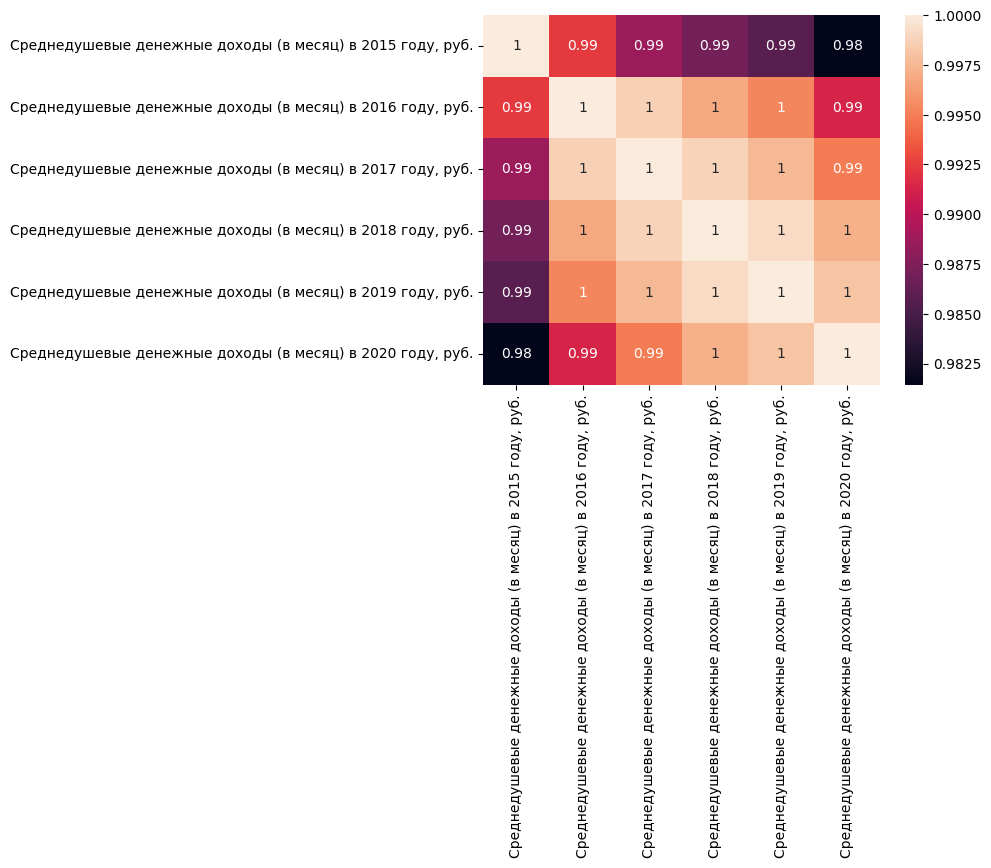

In [3]:
sns.heatmap(per_capita_cash_income_wages.corr(), annot=True);

##### Видим, что признаки сильно коррелируют. И как и в случае с данными о численности населения попробуем рассмотреть динамику среднедушевых доходов от года к году.

In [4]:
per_capita_cash_income_wages_changes = transform_to_changes(per_capita_cash_income_wages) #, 2016, 2021, 'среднедушевых денежных доходов')
per_capita_cash_income_wages_changes = per_capita_cash_income_wages_changes.rename(
    lambda arg: f"Динамика среднедушевых денежных доходов на {arg.split(' ')[6]} г., в %", axis=1
)
per_capita_cash_income_wages_changes.head()

,"Динамика среднедушевых денежных доходов на 2016 г., в %","Динамика среднедушевых денежных доходов на 2017 г., в %","Динамика среднедушевых денежных доходов на 2018 г., в %","Динамика среднедушевых денежных доходов на 2019 г., в %","Динамика среднедушевых денежных доходов на 2020 г., в %"
Белгородская область,6.261812,1.822209,1.436952,5.114042,1.511499
Брянская область,2.467133,4.586353,5.886804,6.718074,0.793063
Владимирская область,-1.527827,5.316342,-0.063683,7.727601,2.224150
Воронежская область,-0.279234,0.730774,2.681538,5.721549,0.174880
Ивановская область,6.184689,5.000845,-1.436042,5.268743,1.872528


##### Однако, в отличие от численности населения, которая на мой взгляд не влияет на благополучность региона, само значение среднедушевых доходов - величина значимая. А потому я предлагаю оставить из этой таблицы данные только за 2020 год, поскольку он меньше коррелирует с другими признаками, чем другие.

In [5]:
per_capita_cash_income_wages = per_capita_cash_income_wages.drop(columns=[
    'Среднедушевые денежные доходы (в месяц) в 2015 году, руб.',
    'Среднедушевые денежные доходы (в месяц) в 2016 году, руб.',
    'Среднедушевые денежные доходы (в месяц) в 2017 году, руб.',
    'Среднедушевые денежные доходы (в месяц) в 2018 году, руб.',
    'Среднедушевые денежные доходы (в месяц) в 2019 году, руб.'
])
per_capita_cash_income_wages.head()

,"Среднедушевые денежные доходы (в месяц) в 2020 году, руб."
Белгородская область,32841.0
Брянская область,28596.0
Владимирская область,25922.0
Воронежская область,32078.0
Ивановская область,26277.0


##### И посмотрим на корреляцию признаков, отражающих динамику среднедушевых доходов.

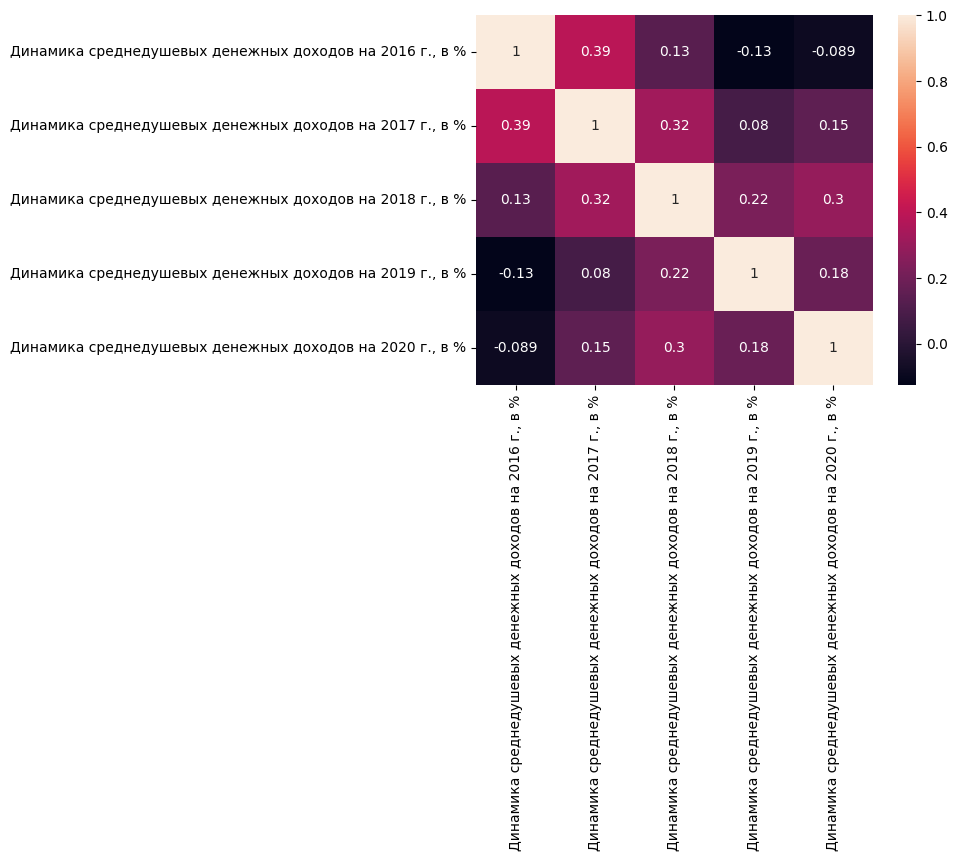

In [6]:
sns.heatmap(per_capita_cash_income_wages_changes.corr(), annot=True);

##### И здесь мы видим, что признаки не коррелируют друг с другом.

In [7]:
per_capita_cash_income_wages.to_csv('../datasets_mod/per_capita_cash_income_wages.csv', sep=',')
per_capita_cash_income_wages_changes.to_csv('../datasets_mod/per_capita_cash_income_wages_changes.csv', sep=',')